In [2]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
# X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(15))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 20 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=20, validation_split=0.1)

Train on 13501 samples, validate on 1501 samples
Epoch 1/20
13501/13501 [==============================] - 10s 773us/sample - loss: 2.9802 - acc: 0.0915 - val_loss: 2.5470 - val_acc: 0.1219
Epoch 2/20
13501/13501 [==============================] - 10s 723us/sample - loss: 2.3301 - acc: 0.1988 - val_loss: 1.8918 - val_acc: 0.3871
Epoch 3/20
13501/13501 [==============================] - 10s 707us/sample - loss: 1.8301 - acc: 0.3683 - val_loss: 1.4540 - val_acc: 0.5503
Epoch 4/20
13501/13501 [==============================] - 10s 705us/sample - loss: 1.4962 - acc: 0.5042 - val_loss: 1.2147 - val_acc: 0.6329
Epoch 5/20
13501/13501 [==============================] - 10s 758us/sample - loss: 1.3232 - acc: 0.5689 - val_loss: 1.0793 - val_acc: 0.6716
Epoch 6/20
13501/13501 [==============================] - 10s 731us/sample - loss: 1.2072 - acc: 0.6085 - val_loss: 0.9611 - val_acc: 0.7215
Epoch 7/20
13501/13501 [==============================] - 9s 697us/sample - loss: 1.1258 - acc: 0.6392 - 

Saved model to disk
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


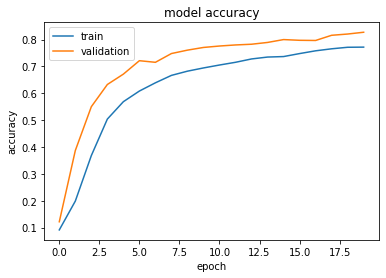

In [3]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('kerasmodel.h5')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')